# Read ACCESS-CM2-025 cz861 intake catalogue

In [45]:
import intake
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
cat = intake.open_esm_datastore(
    "/g/data/lg87/wgh581/datastore_ACCESS_CM2_025_cz861.json",
    columns_with_iterables=["variable"] # This is important
)

In [4]:
#cat.keys()

Start a dask cluster

In [3]:
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

from dask.distributed import Client

client = Client(threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 28
Total threads: 28,Total memory: 126.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38349,Workers: 28
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 126.00 GiB
Comm: tcp://127.0.0.1:34269,Total threads: 1
Dashboard: /proxy/40175/status,Memory: 4.50 GiB
Nanny: tcp://127.0.0.1:45583,


In [38]:
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025_cz861/'

#### Surface ocean temperature, salinity

Temperature

In [4]:
ds = cat.search(variable="temp",frequency="1mon").to_dask()

In [36]:
%%time
data = ds.temp.sel(st_ocean=0, method='nearest').sel(time=slice('0001-01-01','0501-12-31')).resample(time='YE').mean()
data = data.where(data>10, np.nan)
data.load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/distributed/client.py:3371: UserWarning: Sending large graph of size 323.94 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


CPU times: user 12min 31s, sys: 48.7 s, total: 13min 20s
Wall time: 13min 51s


<xarray.DataArray 'temp' (time: 500, yt_ocean: 1080, xt_ocean: 1440)> Size: 3GB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * xt_ocean  (xt_ocean) float64 12kB -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yt_ocean  (yt_ocean) float64 9kB -81.08 -80.97 -80.87 ... 89.74 89.84 89.95
    st_ocean  float64 8B 1.152
  * time      (time) object 4kB 0001-12-31 00:00:00 ... 0500-12-31 00:00:00
Attributes:
    long_name:      Conservative temperature
    units:          K
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_conservative_temperature

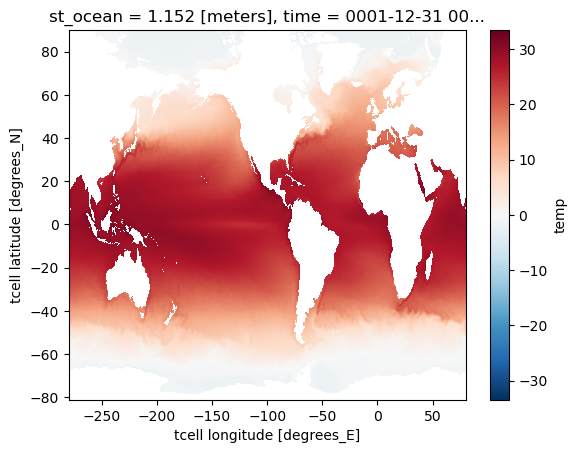

In [19]:
(data[0,...]-273.15).plot()

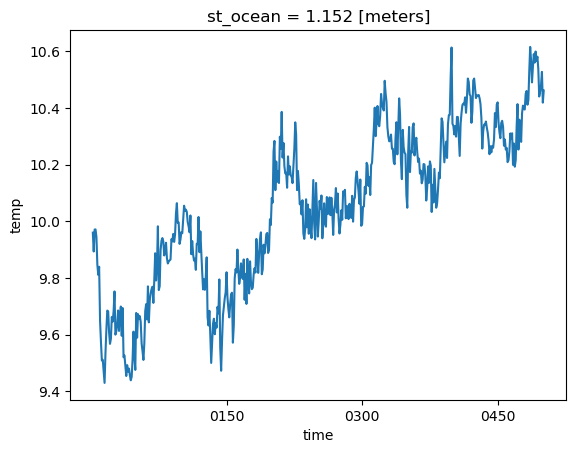

In [37]:
(data.mean('xt_ocean').mean('yt_ocean')-273.15).plot()

In [39]:
data.to_netcdf(path_to_data + 'temp_surface_ave_annual.nc')

Salinity

In [40]:
ds = cat.search(variable="salt",frequency="1mon").to_dask()

In [42]:
%%time
data = ds.salt.sel(st_ocean=0, method='nearest').sel(time=slice('0001-01-01','0501-12-31')).resample(time='YE').mean()
data = data.where(data>10, np.nan)
data.load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/distributed/client.py:3371: UserWarning: Sending large graph of size 323.95 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


CPU times: user 12min 49s, sys: 50.2 s, total: 13min 39s
Wall time: 13min 50s


<xarray.DataArray 'salt' (time: 500, yt_ocean: 1080, xt_ocean: 1440)> Size: 3GB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * xt_ocean  (xt_ocean) float64 12kB -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yt_ocean  (yt_ocean) float64 9kB -81.08 -80.97 -80.87 ... 89.74 89.84 89.95
    st_ocean  float64 8B 1.152
  * time      (time) object 4kB 0001-12-31 00:00:00 ... 0500-12-31 00:00:00
Attributes:
    long_name:      Practical Salinity
    units:          psu
    valid_range:    [-10. 100.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_salinity

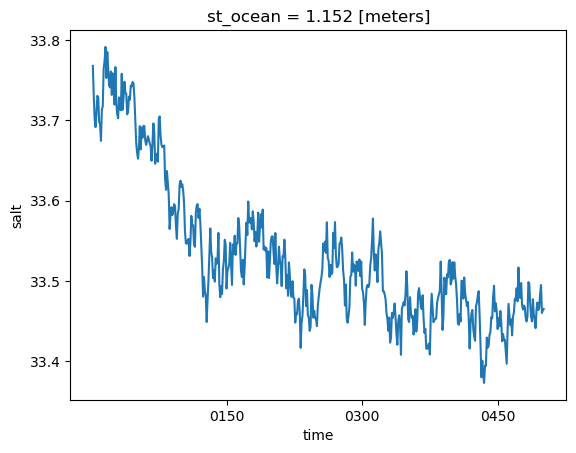

In [43]:
data.mean('xt_ocean').mean('yt_ocean').plot()

In [44]:
data.to_netcdf(path_to_data + 'salt_surface_ave_annual.nc')

In [46]:
temp_surface_ave_annual = xr.open_dataarray(path_to_data + 'temp_surface_ave_annual.nc')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/coding/times.py:1005: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/core/indexing.py:516: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


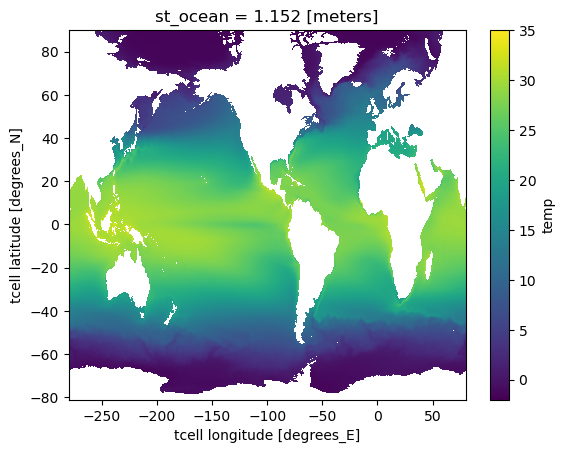

In [53]:
(temp_surface_ave_annual.sel(time=slice('0400-01-01','0499-12-31')).mean('time')-273.14).plot(vmin=-2, vmax=35)

In [54]:
path_to_data_old = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'
SST_CM2_025 = xr.open_dataarray(path_to_data_old + 'SST_global_annual.nc')
SST_CM2_025 = SST_CM2_025.sel(time=slice('0400-01-01','0499-12-31')).mean('time')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/coding/times.py:1005: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/core/indexing.py:516: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


In [ ]:
WOA13_025 = xr.open_mfdataset('/g/data/ik11/observations/woa13/025_KDS50/woa13_ts_??_mom025.nc')
WOA13_025 = WOA13_025.rename({'GRID_Y_T': 'yt_ocean', 'GRID_X_T': 'xt_ocean', 'ZT': 'st_ocean'})
WOA13_025['yt_ocean'] = SST_CM2_025.yt_ocean
WOA13_025 = WOA13_025.mean('time').sel(st_ocean=0, method='nearest')
WOA13_025_temp = WOA13_025.temp.load()
WOA13_025_salt = WOA13_025.salt.load()

In [56]:
temp_anom_CM2_025 = SST_CM2_025-WOA13_025_temp
temp_anom_CM2_025 = temp_anom_CM2_025.where(temp_anom_CM2_025>-100, np.nan)

In [67]:
temp_anom_CM2_025_cz861 = (temp_surface_ave_annual.mean('time')-273.15)-WOA13_025_temp
temp_anom_CM2_025_cz861 = temp_anom_CM2_025_cz861.where(temp_anom_CM2_025_cz861>-100, np.nan)

In [61]:
geolon_t = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc').geolon_t
geolat_t = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc').geolat_t

In [68]:
temp_anom_CM2_025 = temp_anom_CM2_025.assign_coords({'geolon_t': geolon_t, 'geolat_t': geolat_t})

temp_anom_CM2_025_cz861 = temp_anom_CM2_025_cz861.assign_coords({'geolon_t': geolon_t, 'geolat_t': geolat_t})

In [63]:
import cartopy.feature as cft

land_50m = cft.NaturalEarthFeature('physical', 'land', '50m', edgecolor='black', facecolor='darkgrey', linewidth=0.5)

In [65]:
import cartopy.crs as ccrs
import cmocean as cm
import matplotlib.gridspec as gridspec

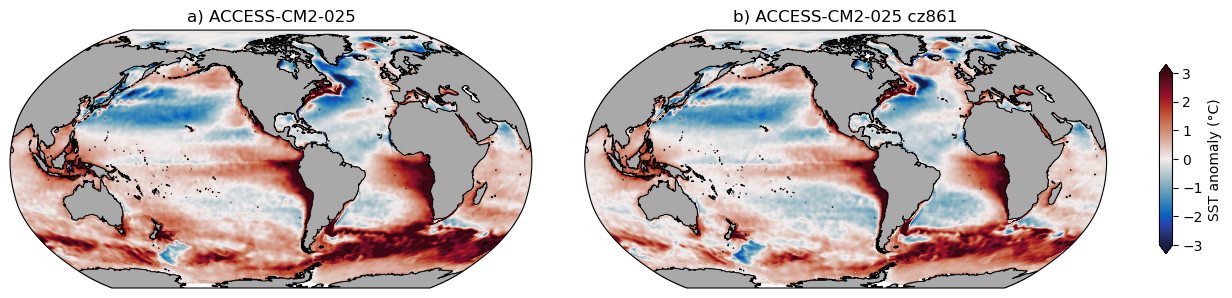

In [69]:
fig = plt.figure(figsize=(15,10))
gs  = gridspec.GridSpec(8, 3, width_ratios=[1, 1, 0.025], hspace=0.05, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = temp_anom_CM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-3, vmax=3, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('a) ACCESS-CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
temp_anom_CM2_025_cz861.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-3, vmax=3, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('b) ACCESS-CM2-025 cz861')

cbar_ax = fig.add_subplot(gs[1:3, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, label='SST anomaly (°C)', extend='both')

### Total ocean temperature, salinity time series

In [28]:
temp_global_ave = cat.search(variable="temp_global_ave").to_dask().temp_global_ave
salt_global_ave = cat.search(variable="salt_global_ave").to_dask().salt_global_ave

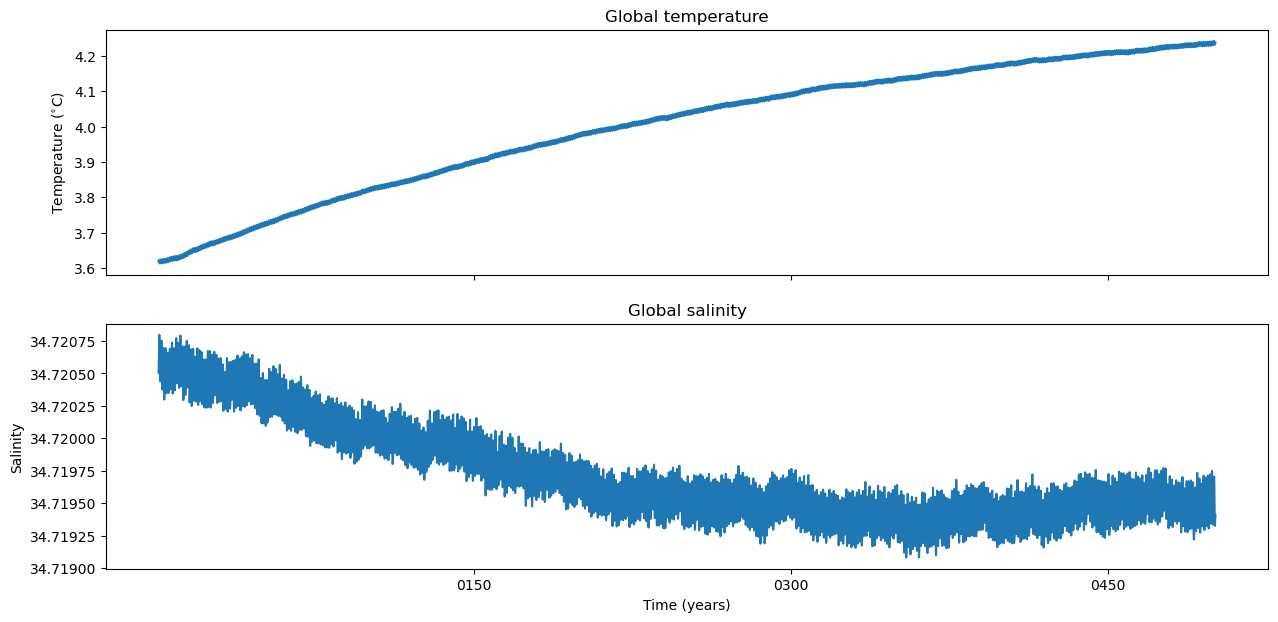

In [29]:
fig = plt.figure(figsize=(15, 7))

plt.subplot(211)
temp_global_ave.plot()
plt.title('Global temperature')
plt.tick_params(labelbottom=False)
plt.xlabel('')
plt.ylabel('Temperature ($^{\circ}$C)')

plt.subplot(212)
salt_global_ave.plot()
plt.title('Global salinity')
plt.ylabel('Salinity')
plt.xlabel('Time (years)');